# Package

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
import os
import package_DBR
import package_lab

from importlib import reload
package_DBR = reload(package_DBR)
package_lab = reload(package_lab)

from package_DBR import *
from package_lab import *

# LEAD_LAG()

In [9]:
help(LeadLag_RT)

Help on function LeadLag_RT in module package_lab:

LeadLag_RT(MV, Kp, T_lead, T_lag, Ts, PV, PVInit=0, method='EBD')
    The function "LeadLag_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :T: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    The function "LeadLag_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



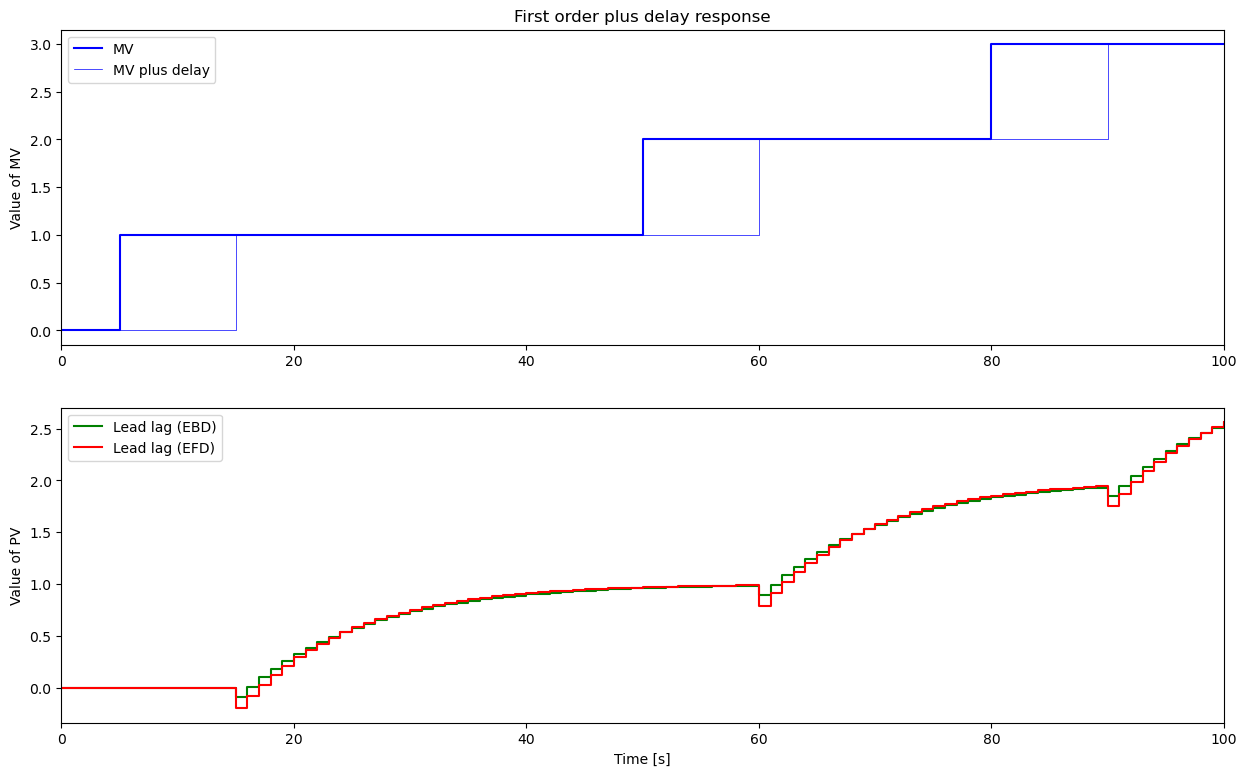

In [10]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []


# Parameters
Kp = 1
Tlag = 10
Tlead = -2
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LeadLag_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EBD,0,'EBD')
    LeadLag_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EFD,0,'EFD')
    LeadLag_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)

plt.step(t,PV_EBD,'g-',label='Lead lag (EBD)',where='post')
plt.step(t,PV_EFD,'r-',label='Lead lag (EFD)',where='post')
#plt.step(t,PV_TRAP,'y-',label='Lead lag (TRAP)',where='post') verifier

plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

nameFile = 'Plots/LeadLag'

if not os.path.exists('Plots'):
    os.makedirs('Plots')
    
plt.savefig(nameFile + '.png',transparent=True)
plt.savefig(nameFile + '.pdf',transparent=True)    

 # PID_RT()

In [11]:
help(PID_RT)

Help on function PID_RT in module package_lab:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')
    The function "PID_RT" needs to be included in a "for or while loop". 
    
    :SP: SP (or SetPoint) vector 
    :PV: PV (or Process Value) vector 
    :Man: Man (or Manual controller mode) vector (True or False) 
    :MVMan: MVMan (or Manual value for MV) vector 
    :MVFF: MVFF (or Feedforward) vector 
    
    :Kc: controller gain 
    :Ti: integral time constant [s] 
    :Td: derivative time constant [s] 
    :alpha: Tfd = alpha*Td where Tfd is the derivative filter time constant [s] 
    :Ts: sampling period [s] 
    
    :MVMin: minimum value for MV (used for saturation and anti wind-up) 
    :MVMax: maximum value for MV (used for saturation and anti wind-up) 
     
    :MV: MV (or Manipulated Value) vector 
    :MVP: MVP (or Propotional part of MV) vector 
    :MVI: MVI (or Integral part of MV) ve

# PID avec méthode EBD

(0.0, 600.0)

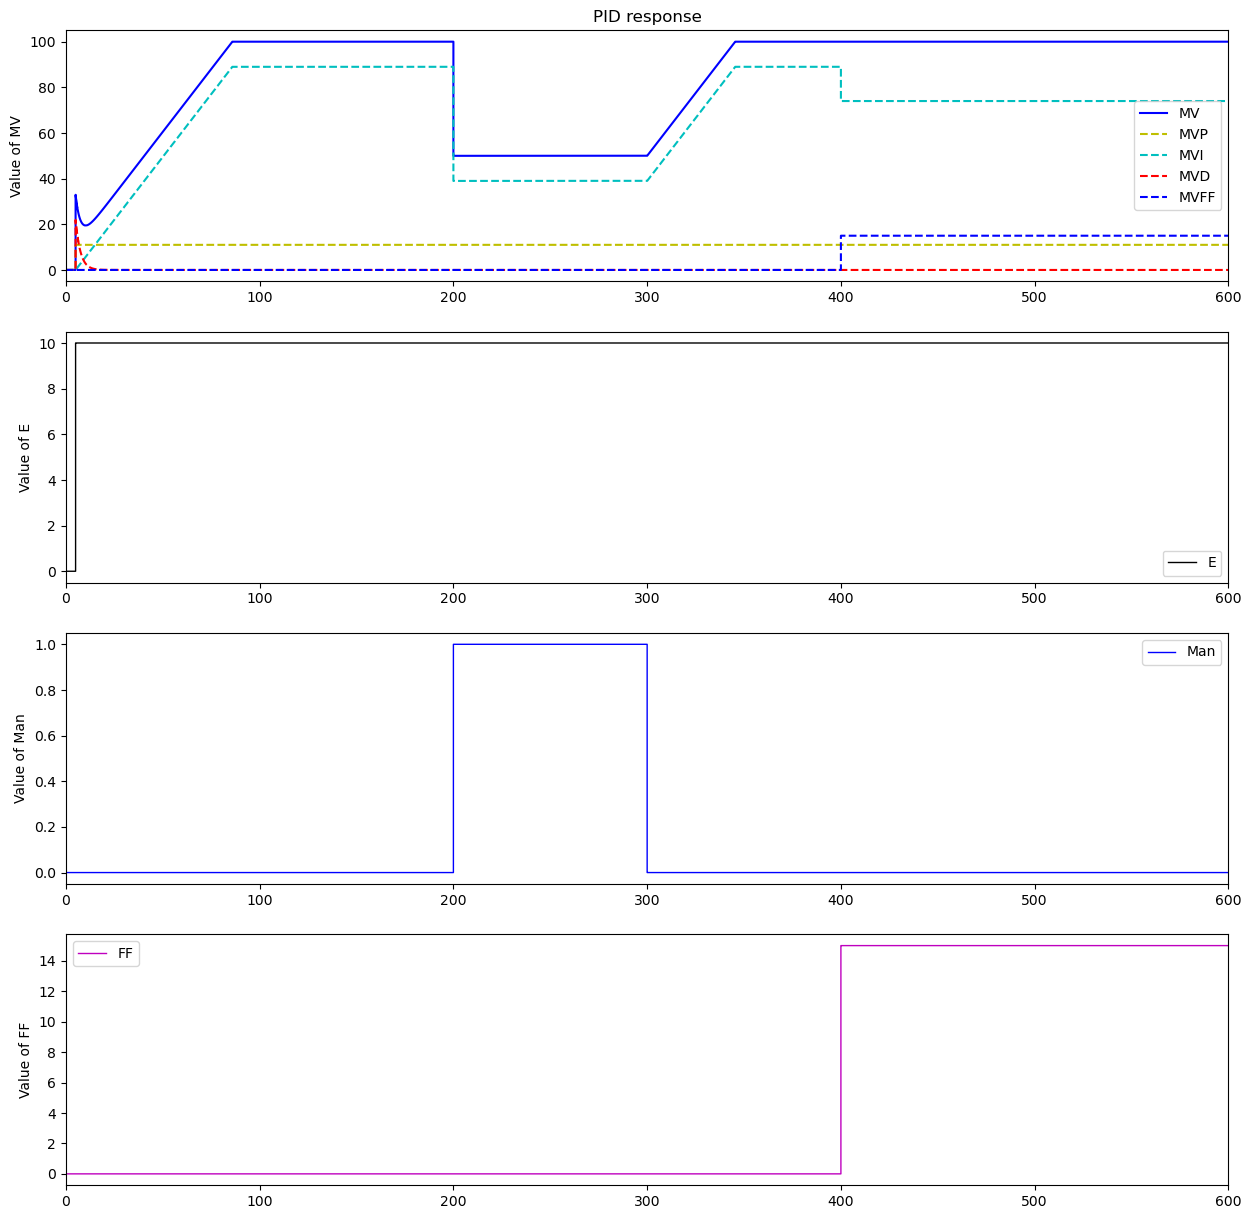

In [12]:
t = []

TSim = 600
Ts = 0.01

Kc = 1.1
Ti = 10
Td = 5
alpha = 0.5
N = int(TSim/Ts) + 1
MVMin = 0 
MVMax = 100

SP = []
MV = []
PV = []
DV =[]
Man = []
MVMan = []
MVFF = []
MVP = []
MVI = []
MVD = [] 
E  = []
EP  = []
ED = []

MVManPath = {0:50, TSim:50}
SPPath = {0: 50, 5: 60, TSim : 60}
PVPath = {0:50, 5:50, TSim:50}
ManPath = {0: False, 200: True, 300:False, TSim : False}
MVFFPath = {0:0, 400: 15, TSim : 15} 


for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVManPath, t,MVMan)
    SelectPath_RT(PVPath, t,PV)
    SelectPath_RT(MVFFPath, t, MVFF)
    SelectPath_RT(SPPath, t,SP)
    SelectPath_RT(ManPath, t,Man)


    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')
    
plt.figure(figsize = (15,15))
plt.subplot(4,1,1)

plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVP,'--y',label='MVP',where='post')
plt.step(t,MVI,'--c',label='MVI',where='post')
plt.step(t,MVD,'--r',label='MVD',where='post')
plt.step(t,MVFF,'--b',label='MVFF',where='post')

plt.ylabel('Value of MV')
plt.title('PID response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(4,1,3)
plt.step(t,Man,'b-',linewidth=1,label='Man',where='post')
plt.ylabel('Value of Man')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(4,1,4)
plt.step(t,MVFF,'m-',linewidth=1,label='FF',where='post')
plt.ylabel('Value of FF')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(4,1,2)
plt.step(t,E ,'k-',linewidth=1,label='E',where='post')
plt.ylabel('Value of E')
plt.legend(loc='best')
plt.xlim([0, TSim])


### IMC Tunning

In [13]:
IMCTuning(Kp= 0.265, Tlag1 = 137.5, Tlag2 = 20.700000000000003,theta =4.299999999999997,  gamma= 0.6, process="SOPDT")

Kp : 0.265, Tlag1 : 137.5, Tlag2 : 20.700000000000003, thetha : 4.299999999999997, Kc : 6.8776628119293965, Ti : 158.2, Td : 17.99146649810367


(6.8776628119293965, 158.2, 17.99146649810367)

### Margins()

Kp : 0.265, Tlag1 : 137.5, Tlag2 : 20.700000000000003, thetha : 4.299999999999997, Kc : 6.8776628119293965, Ti : 158.2, Td : 17.99146649810367


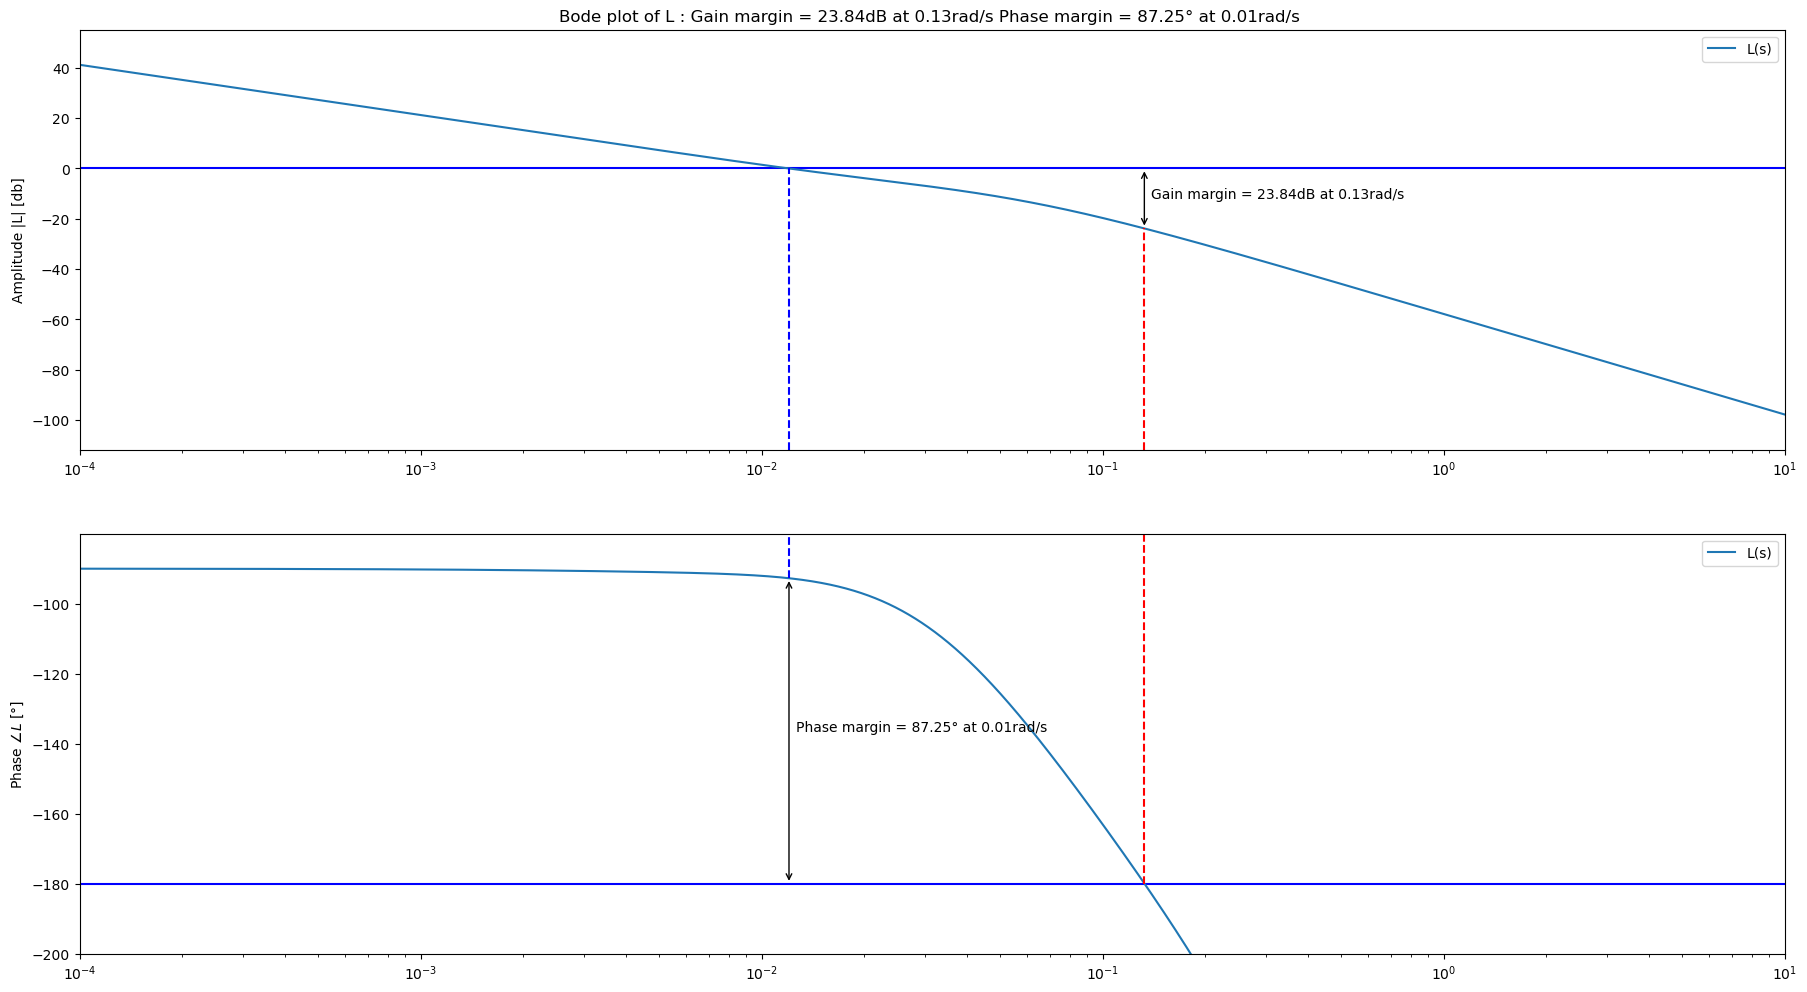

In [14]:
Kp = 0.265
T1p = 137.5
T2p = 20.700000000000003
thetap = 4.299999999999997
gamma = 0.6

P = Process({}) 
P.parameters['Kp'] = Kp
P.parameters['Tlag1'] = T1p
P.parameters['Tlag2'] = T2p 
P.parameters['theta'] = thetap

C = PID({}) 
C.parameters['Kc'],C.parameters['Ti'],C.parameters['Td']  =  IMCTuning(Kp,T1p,T2p,thetap,gamma,'SOPDT')
C.parameters['alpha'] = 1

omega = np.logspace(-4, 1, 10000)

StabilityMargins(P,C,omega)